In [1]:
#Dataset has been obtained from Kaggle
#Dataset is on the IMDB records for some 1000 films over a period of time
#Question: Does the length of film affect its ratings?

# Step: 
#     1. Get population mean of run time
#     2. Hypothesis: Does films greater than/less than average runtime have difference in rating ? 
#     3. Take equal samples of both types of files (Films < avg.runtime && Films > avg.runtime)    

# Why are above steps taken? Basically to get 2 event groups out of the overall one with events independent of each other

In [2]:
#Module Imports section
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
from scipy import stats
import random
import statsmodels.api as sm 
import pylab as py 
import statistics
import math
from statsmodels.stats import weightstats as stests

In [3]:
#File Imports section
imdb = pd.read_csv('D:\Study Materials\Documents to play with in python\IMDB\IMDB-Movie-Data.csv',error_bad_lines=False)
imdb = imdb.rename(columns = {'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue'})
imdb['Runtime'] = imdb['Runtime'].astype(float)
imdb['Rating'] = imdb['Rating'].astype(float)
imdb['Revenue'] = imdb['Revenue'].astype(float)
imdb.fillna(0)
imdb.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121.0,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124.0,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117.0,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108.0,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123.0,6.2,393727,325.02,40.0


In [4]:
#Getting unique counts for all columns
imdb.nunique()

Rank           1000
Title           999
Genre           207
Description    1000
Director        644
Actors          996
Year             11
Runtime          94
Rating           55
Votes           997
Revenue         814
Metascore        84
dtype: int64

In [5]:
run_time_mean_pop = imdb['Runtime'].mean()
run_time_mean_pop

113.172

In [6]:
#Let us get a count of film with rating greater than population mean of runtime
films_grt_thn_avg = DataFrame(imdb.loc[imdb['Runtime'] > run_time_mean_pop]['Title'])
films_grt_thn_avg_cnt = films_grt_thn_avg['Title'].count()

# Let us get equal number of records in films_lsr_thn_avg

films_lsr_thn_avg = DataFrame((imdb.loc[imdb['Runtime'] < run_time_mean_pop]['Title']).sample(n = films_grt_thn_avg_cnt))

#Let us make data frames for these names
films_grt_thn_avg_df = imdb.loc[imdb['Title'].isin(list(films_grt_thn_avg['Title']))]
films_lsr_thn_avg_df = imdb.loc[imdb['Title'].isin(list(films_lsr_thn_avg['Title']))]

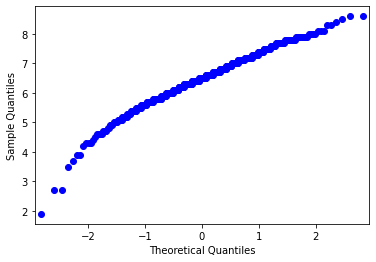

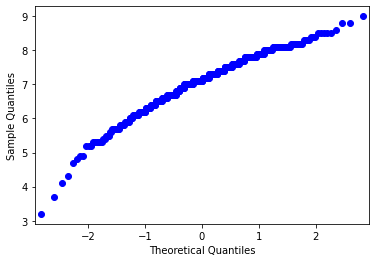

In [7]:
#Now we have 2 groups: Films with runtime > 113 minutes and Films with runtime < 113 minutes
#We will check if the 2 groups differ in their rating 
#mind well; Runtime variable was used to create 2 groups of data. It will not be used for hypothesis testing
#Hypothesis testing will be done on 'Rating'

# H0 : Ratings for films with Runtime < average and films with Runtime > average are same/unbiased.Meaning runtime does not impact rating
# H1 : Runtime does impact rating. Their means are unequal

sm.qqplot(films_lsr_thn_avg_df['Rating']) 
py.show()
sm.qqplot(films_grt_thn_avg_df['Rating']) 
py.show()

#Here we get a nearly straight line implying normal distribution. Hence 2 sample Z test can be used

In [8]:
films_grt_thn_avg_df_mean = films_grt_thn_avg_df['Rating'].mean()
films_lsr_thn_avg_df_mean = films_lsr_thn_avg_df['Rating'].mean()
difference_of_mean = 0
films_grt_thn_avg_df_sd = statistics.stdev(films_grt_thn_avg_df['Rating'])
films_lsr_thn_avg_df_sd = statistics.stdev(films_lsr_thn_avg_df['Rating'])
sample_size_for_both = films_grt_thn_avg_cnt

Z_Score_numerator = ((films_grt_thn_avg_df_mean-films_lsr_thn_avg_df_mean) - difference_of_mean)
Z_Score_dinominator = math.sqrt((films_grt_thn_avg_df_sd**2/sample_size_for_both) + (films_lsr_thn_avg_df_sd**2/sample_size_for_both))

Z_Score = Z_Score_numerator/Z_Score_dinominator
P_Values = stats.norm.sf(abs(Z_Score))*2

print(P_Values)

if P_Values<0.05:
    print("reject null hypothesis meaning Runtime Does impact Rating")
    print(films_grt_thn_avg_df_mean,films_lsr_thn_avg_df_mean)
else:
    print("accept null hypothesis")

3.173017069407569e-24
reject null hypothesis meaning Runtime Does impact Rating
7.063510392609697 6.446882217090072


In [9]:
# Using Python libraries for directly calculating the same
ztest ,P_Value = stests.ztest(films_grt_thn_avg_df['Rating'], x2=films_lsr_thn_avg_df['Rating'], value=0,alternative='two-sided')
print(float(P_Value))

if P_Value<0.05:
    print("reject null hypothesis meaning Runtime Does impact Rating")
    print(films_grt_thn_avg_df_mean,films_lsr_thn_avg_df_mean)
else:
    print("accept null hypothesis")

3.1730170694046556e-24
reject null hypothesis meaning Runtime Does impact Rating
7.063510392609697 6.446882217090072


In [10]:
#Question 2: Does rating impact ? Simply find correlation

imdb['Rating'].corr(imdb['Revenue'])

#21.7 % is a weak correlation between Rating and Revenue to say that Rating impacts Revenue

0.21765389419106007

In [11]:
# One Sample Hypothesis Testing
#Below data is playstore Google data.
#Data has been obtained from KAggle data sources

# Quesion : Does the average rating for apps classified as 'Teen' are lesser than 3.62?

playstore = pd.read_csv('D:\Study Materials\Documents to play with in python\playstore apps\googleplaystore.csv',error_bad_lines=False)
playstore['Rating'].replace('NaN',0)
playstore['Rating'].replace('',0)
playstore.fillna(0)
playstore['Rating'] = playstore['Rating'].astype(float)
playstore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
playstore.nunique()

App               9660
Category            35
Rating              41
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             121
Last Updated      1378
Current Ver       2785
Android Ver         33
dtype: int64

In [13]:
playstore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [14]:
population_rating_mean = playstore['Rating'].mean()
population_rating_mean

3.6231897426436723

In [15]:
Teen = playstore[playstore['Content Rating'] == 'Teen']
#Let us take a sample of only 20 such observations
Teen_Sample = Teen.sample(n = 20)
Teen_mean = Teen_Sample['Rating'].mean()
Teen_mean

3.6799999999999997

In [16]:
Population_Standard_Deviation = statistics.stdev(playstore['Rating'])
Population_Standard_Deviation

1.5216782253982721

In [17]:
Z_Score_Numerator = Teen_mean-population_rating_mean
Z_Score_Dinominator = Population_Standard_Deviation/math.sqrt(20)

Z_Score = Z_Score_Numerator/Z_Score_Dinominator

P_Values = stats.norm.sf(abs(Z_Score))*2

print(P_Values)

if P_Values<0.05:
    print("reject null hypothesis meaning Runtime Does impact Rating")
else:
    print("accept null hypothesis meaning Teen apps do have rating greater than/less than population mean")

0.8673995585464225
accept null hypothesis meaning Teen apps do have rating greater than/less than population mean


In [18]:
#Solving above example with formulae
# Using Python libraries for directly calculating the same
ztest ,P_Value = stests.ztest(Teen_Sample['Rating'], x2=None, value=population_rating_mean)
print(float(P_Value))

if P_Value<0.05:
    print("reject null hypothesis meaning Runtime Does impact Rating")
else:
    print("accept null hypothesis meaning Teen apps do have rating greater than/less than population mean")

0.8426701415339224
accept null hypothesis meaning Teen apps do have rating greater than/less than population mean
